In [2]:
import json
import os
import numpy as np

In [10]:
dir = "/p/lustre1/ranganath2/cardiac-ai.tmp/ECG/SELFTRANSFORMER-20240904-101218-877927-q1nu5rz8"
os.chdir(os.path.join(dir, "ECG_test"))


In [11]:
with open('predictions.json') as f:
    data = json.load(f)

In [12]:
data = {key: np.array(value) for key, value in data.items()}

In [14]:
prediction = data["16000"][0]
true = data["16000"][1]
print(prediction.shape)


(50, 10, 75)


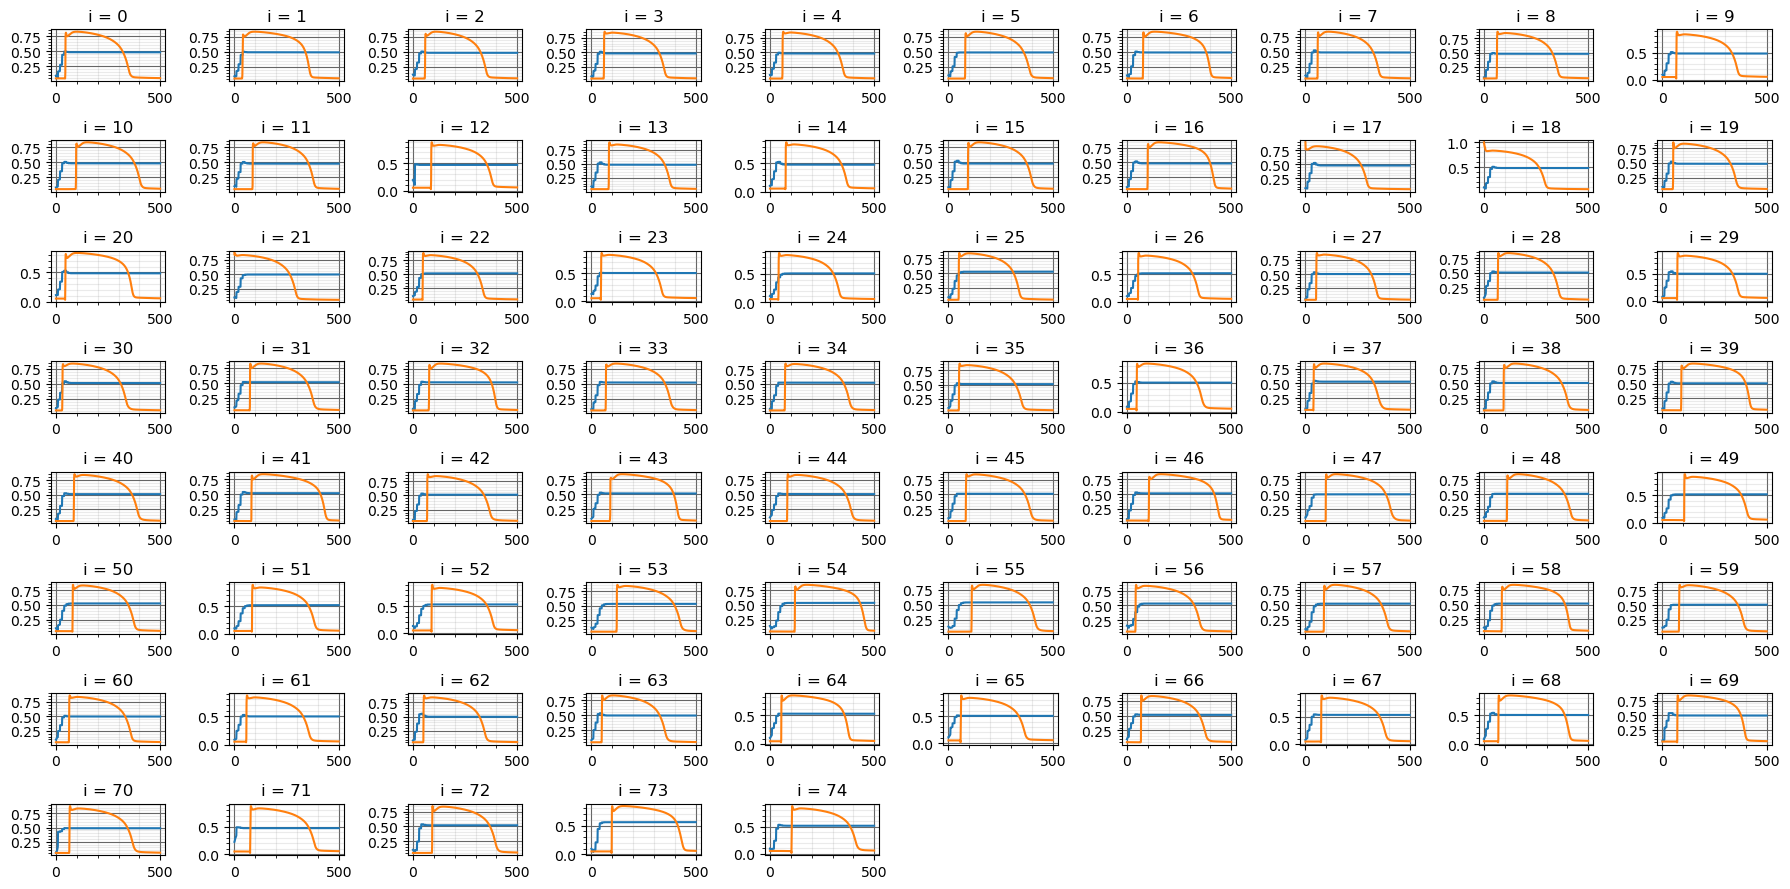

In [15]:
from matplotlib import pyplot
pyplot.figure(figsize=(18, 9))
prediction = data["16000"][0]
true = data["16000"][1]
prediction = prediction.reshape(500, 75)
true = true.reshape(500, 75)
for count, i in enumerate(range(prediction.shape[1])):
    pyplot.subplot(8, 10, count + 1)
    pyplot.plot(prediction[:,i])
    pyplot.plot(true[:,i])
    pyplot.title(f'i = {i}')
    pyplot.grid(visible=True, which='major', color='#666666', linestyle='-')
    pyplot.minorticks_on()
    pyplot.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
pyplot.tight_layout()
pyplot.show()

16063
0.1099822203414421
16031
0.10612855100555132


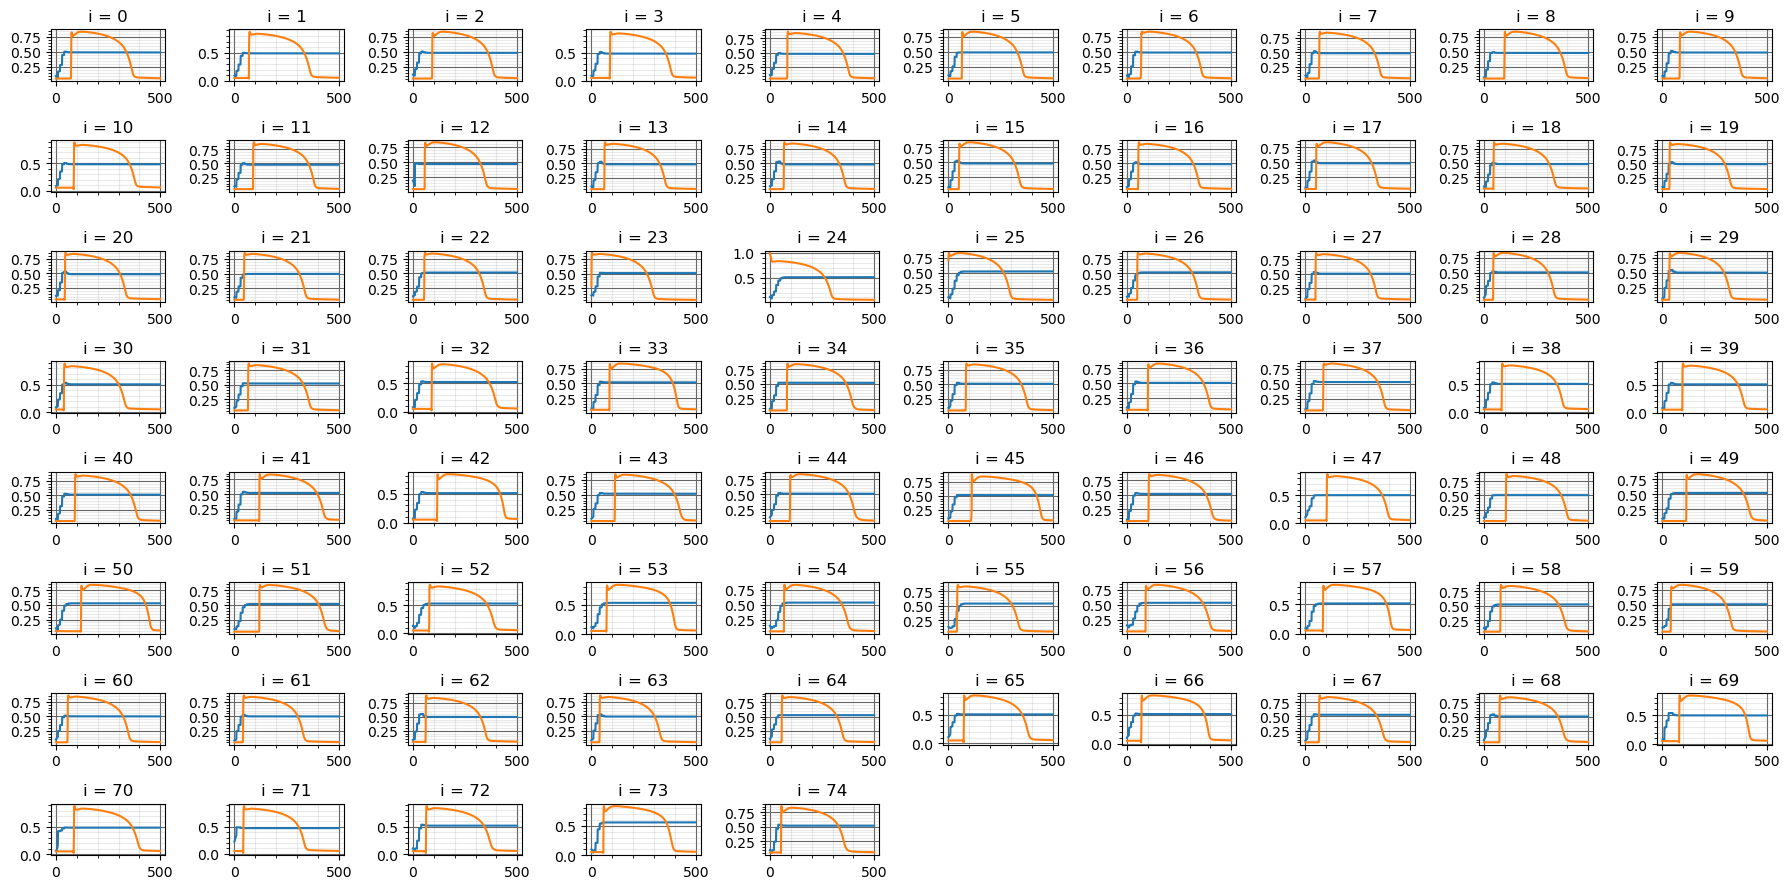

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
maxErr = -float('inf')
minErr = float('inf')
maxKey = None
for key in data.keys():
    if mean_squared_error(data[key][0].reshape(-1), data[key][1].reshape(-1)) > maxErr:
        maxKey = key
        maxErr = mean_squared_error(data[key][0].reshape(-1), data[key][1].reshape(-1))
    if mean_squared_error(data[key][0].reshape(-1), data[key][1].reshape(-1)) < minErr:
        minKey = key
        minErr = mean_squared_error(data[key][0].reshape(-1), data[key][1].reshape(-1))
    


print(maxKey)
print(maxErr)
print(minKey)
print(minErr)
prediction = data[maxKey][0]
true = data[maxKey][1]
prediction = prediction.reshape(500, 75)
true = true.reshape(500, 75)
pyplot.figure(figsize=(18, 9))
for count, i in enumerate(range(prediction.shape[1])):
    pyplot.subplot(8, 10, count + 1)
    pyplot.plot(prediction[:,i])
    pyplot.plot(true[:,i])
    pyplot.title(f'i = {i}')
    pyplot.grid(visible=True, which='major', color='#666666', linestyle='-')
    pyplot.minorticks_on()
    pyplot.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
pyplot.tight_layout()
pyplot.show()



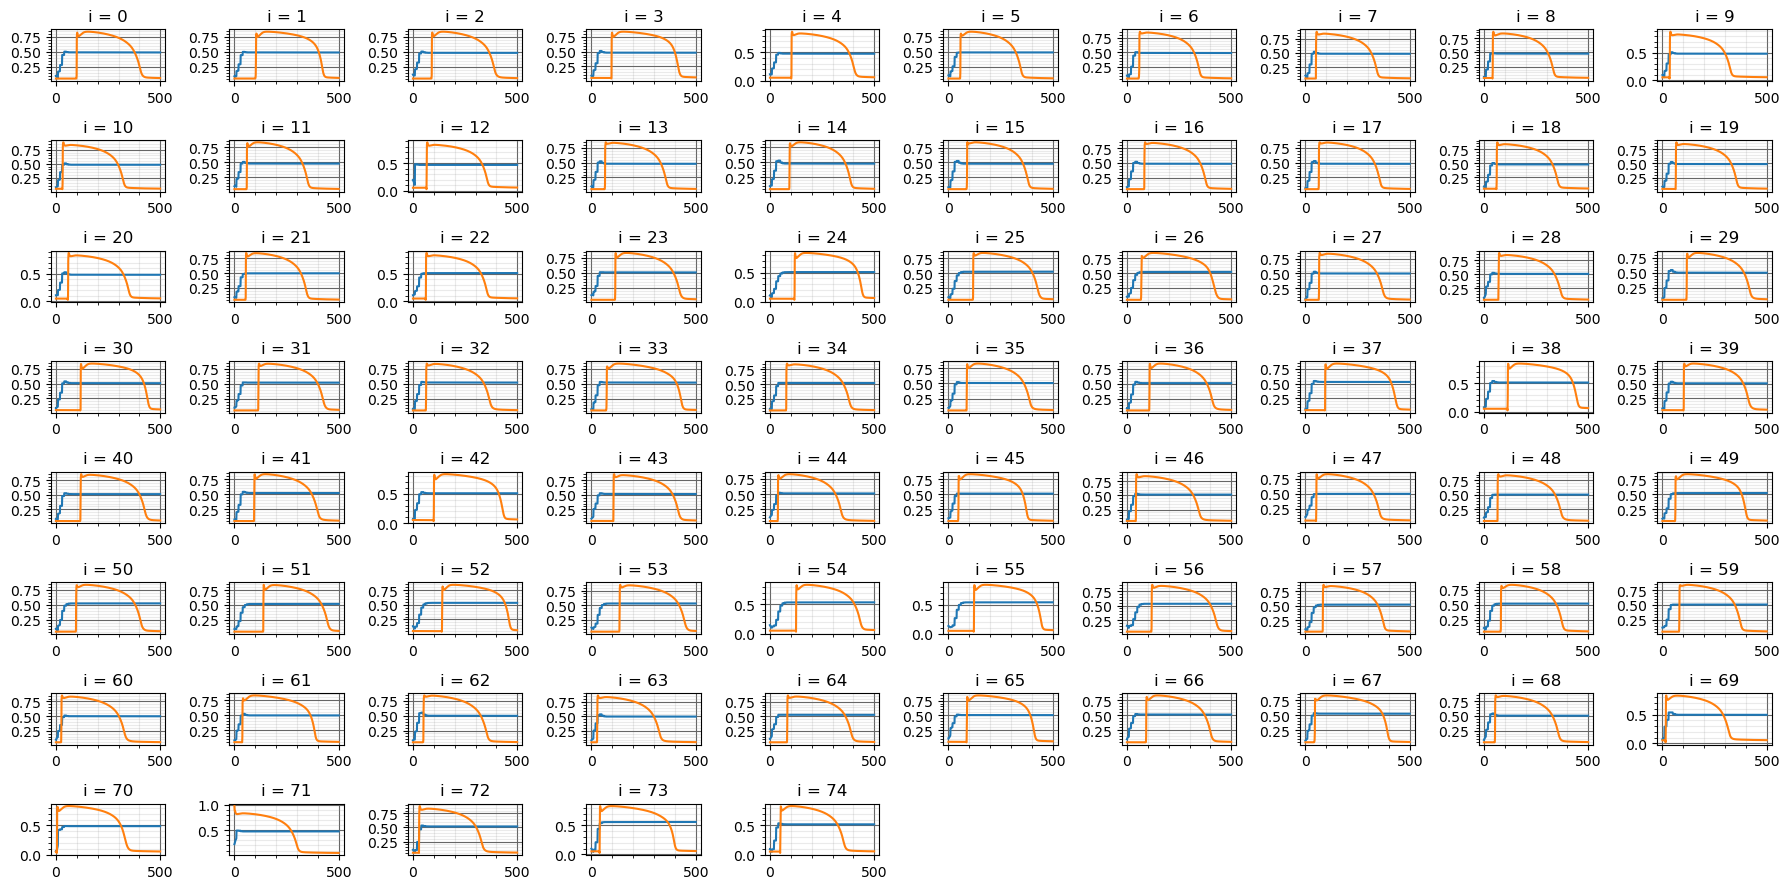

In [17]:
prediction = data[minKey][0]
true = data[minKey][1]
prediction = prediction.reshape(500, 75)
true = true.reshape(500, 75)
pyplot.figure(figsize=(18, 9))
for count, i in enumerate(range(prediction.shape[1])):
    pyplot.subplot(8, 10, count + 1)
    pyplot.plot(prediction[:,i])
    pyplot.plot(true[:,i])
    pyplot.title(f'i = {i}')
    pyplot.grid(visible=True, which='major', color='#666666', linestyle='-')
    pyplot.minorticks_on()
    pyplot.grid(visible=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
pyplot.tight_layout()
pyplot.show()